In [1]:
#Import Pandas Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Load and Explore Data
dataset=pd.read_csv('insurance_pre.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
# One-hot encoding on categorical variables in a dataset and one of the dummy columns will be dropped 
dataset=pd.get_dummies(dataset,drop_first=True)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [6]:
#It will be a list containing the column names of your dataset
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [7]:
# Input Data Preprocess 
indepentent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [8]:
# Output Data Preprocess 
depentent=dataset[['charges']]

In [33]:
#Create the Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import make_regression
regressor=make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=1)


In [20]:
# Create a Decision Tree Regressor
tree_reg = DecisionTreeRegressor()

In [21]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [22]:
# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [23]:
# Fit the grid search to the data (no need to explicitly split into training and testing)
grid_search.fit(indepentent, depentent)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [28]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [29]:
feature_importances = best_model.feature_importances_


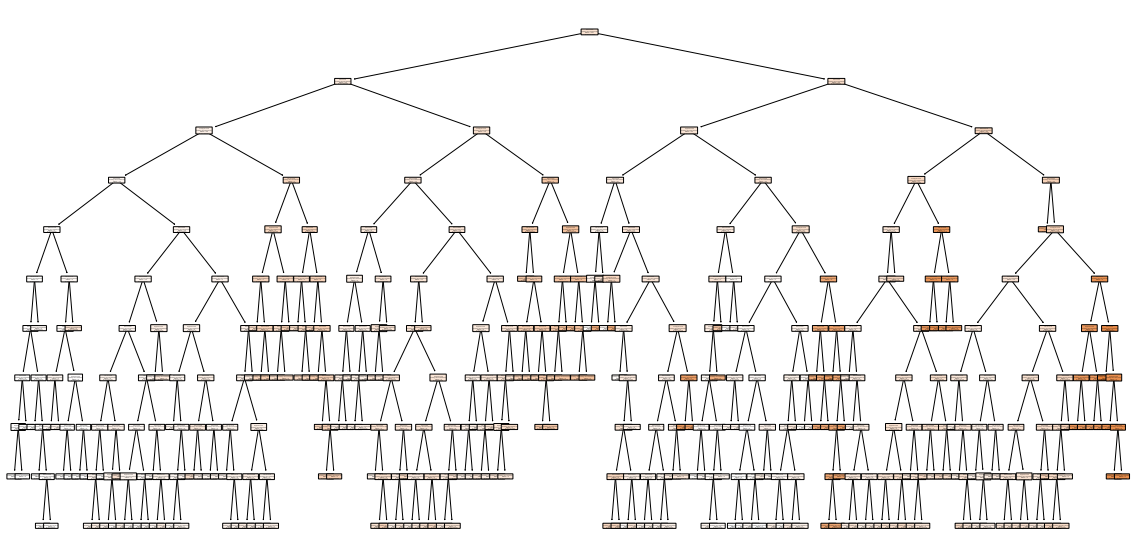

In [30]:
#Visualize the decision tree using plot_tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=indepentent.columns, class_names=None, rounded=True)
plt.show()


In [31]:
# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Best Model Performance (MSE):", -grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Model Performance (MSE): 26685717.76932483
